In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sci378 import *

Version:  0.0.7


In [3]:
from lmfit import *

## Crichton problem

- need temperature vs time data for all of the station (csv files in one folder)
- need rural/urban info for each station
- location (latitude, logitude) for each station


- for each file do ....
    - load data
    - fit to a line
    - get the slope of the line
    - store those values


- average of all the slopes?  (X)
- count all positives/negatives for rural, urban -- fraction of positive for rural vs urban
- average urban average rural, look statistical test on the average

- go through all the urban stations
    - find the closest rural station
    - I already have the slopes - rural slope value, and an urban slope value
    
- plot the difference (histogram)
- plot rural slope (y-axis) vs urban slope (x-axis)


In [96]:
data=pd.read_csv('data/time series data pandas.csv.zip')
data

,time,ALBERNI_ROBERTSON_CREEK,VAL_D'OR,WADI_HALFA,SETTAT,SAN_JUAN_DE_LA_MAGUANA,REVELSTOKE_A,LONDON_INT'L_AIRPORT,EUFAULA_WILDLIFE_REF,OAK_MOUNTAIN_CALIFORNIA,...,SANTIAGO_COMPOSTELA,HEMLOCK,LONGVIEW_E_TX_RGNL_AP,LITTLE_SNOWY_MONTANA,YOUNG_POST_OFFICE,KEM,JINGHONG,ICH'ON,VICTORIA_VICTORIA,IRON_RIVER
0,1880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,2016,9.030,2.924167,29.372727,NaN,NaN,NaN,NaN,NaN,14.916667,...,NaN,9.825000,19.801667,6.534167,NaN,NaN,NaN,NaN,NaN,NaN
137,2017,3.155,2.206667,27.937500,NaN,NaN,NaN,NaN,NaN,15.155833,...,NaN,9.433333,20.028333,5.834167,NaN,NaN,NaN,NaN,NaN,NaN
138,2018,4.735,1.804167,28.583333,NaN,NaN,NaN,NaN,NaN,15.419167,...,NaN,8.919167,19.382500,4.616667,NaN,NaN,NaN,NaN,NaN,NaN
139,2019,4.885,1.297500,28.037500,NaN,NaN,NaN,NaN,NaN,14.261667,...,NaN,8.424167,19.047500,3.878333,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
#data.to_excel('test.xlsx')

ValueError: This sheet is too large! Your sheet size is: 141, 19811 Max sheet size is: 1048576, 16384

In [25]:
station_info=pd.read_excel('data/station_info_updated.xlsx')
station_info.shape

(19810, 6)

In [26]:
station_info.head()

,ID,Station,Latitude,Longitude,Brightness,Elevation
0,ACW00011604,SAVE,57.7667,11.8667,45.0,18.0
1,AE000041196,SHARJAH_INTER_AIRP,25.3330,55.5170,39.0,34.0
2,AEM00041184,RAS_AL_KHAIMAH_INTE,25.6170,55.9330,17.0,31.0
3,AEM00041194,DUBAI_INTL,25.2550,55.3640,104.0,10.4
4,AEM00041216,ABU_DHABI_BATEEN_AIR,24.4300,54.4700,114.0,3.0


In [54]:
station_info[station_info['Brightness']<10]

,ID,Station,Latitude,Longitude,Brightness,Elevation
7,AFM00040911,MAZAR_I_SHARIF,36.700,67.2000,0.0,378.0
8,AFM00040938,HERAT,34.210,62.2280,0.0,977.2
9,AFM00040948,KABUL_INTL,34.566,69.2120,0.0,1791.3
10,AFM00040990,KANDAHAR_AIRPORT,31.500,65.8500,0.0,1010.0
14,AG000060680,TAMANRASSET,22.800,5.4331,0.0,1362.0
...,...,...,...,...,...,...
19803,ZI000067969,WEST_NICHOLSON,-21.050,29.3670,0.0,861.0
19804,ZI000067975,MASVINGO,-20.067,30.8670,0.0,1095.0
19805,ZI000067983,CHIPINGE,-20.200,32.6160,0.0,1132.0
19806,ZI000067991,BEITBRIDGE,-22.217,30.0000,8.0,457.0


In [58]:
def get_slope(name,plotit=False):
    subdata=data[['time',name]].dropna()
    x_data=subdata['time']
    y_data=subdata[name]
    model=models.LinearModel()
    result=model.fit(y_data,x=x_data)
    
    if plotit:
        plot(x_data,y_data,'o')

        x_fake=linspace(1960,2020,100)
        y_fake=result.eval(x=x_fake)
        plot(x_fake,y_fake,'-')
        title(name)
    
    return result.params['slope'].value


def first_row(name):
    return station_info[station_info['Station']==name].iloc[0]    

In [59]:
get_slope('MAZAR_I_SHARIF'),first_row('MAZAR_I_SHARIF')

(-0.05879145283711251,
 ID               AFM00040911
 Station       MAZAR_I_SHARIF
 Latitude                36.7
 Longitude               67.2
 Brightness               0.0
 Elevation              378.0
 Name: 7, dtype: object)

In [61]:
from tqdm import tqdm

In [62]:
S=Storage()
slope_data={}

for name in tqdm(station_info['Station']):
    data1=Struct()
    data1.slope=get_slope(name)
    data1.station=name
    
    row=first_row(name)
    if row.Brightness>=10:
        data1.urban=True
    else:
        data1.urban=False
        
    data1.latitude=row.Latitude
    data1.longitude=row.Longitude
    
    slope_data[name]=data1
    


100%|██████████| 19810/19810 [04:14<00:00, 77.98it/s]


In [64]:
all([slope_data[_].urban for _ in slope_data])

False

In [65]:
def closest_rural(urban_name):
    min_distance=1e500
    min_name=None
    
    for name in station_info['Station']:
        if slope_data[name].urban:
            continue # skip the urbans
            
        x1,y1=slope_data[name].latitude,slope_data[name].longitude
        x2,y2=slope_data[urban_name].latitude,slope_data[urban_name].longitude
        distance=sqrt((x1-x2)**2+(y1-y2)**2)
        
        if distance<min_distance:
            min_distance=distance
            min_name=name
            
    return min_name
    

In [73]:
for name in tqdm(slope_data):
        
    if slope_data[name].urban:
        rural_name=closest_rural(name)
        slope_data[name].closest_rural_name=rural_name
        slope_data[name].closest_rural_slope=slope_data[rural_name].slope
    else:
        continue
        
    
    

100%|██████████| 19810/19810 [08:11<00:00, 40.30it/s] 


In [76]:
urban_slope=array([slope_data[_].slope for _ in slope_data if slope_data[_].urban])
nearby_rural_slope=array([slope_data[_].closest_rural_slope for _ in slope_data if slope_data[_].urban])
rural_slope=array([slope_data[_].slope for _ in slope_data if not slope_data[_].urban])

In [98]:
len(urban_slope)

8563

(0.0045507571702130606, 0.0033465970491674915)

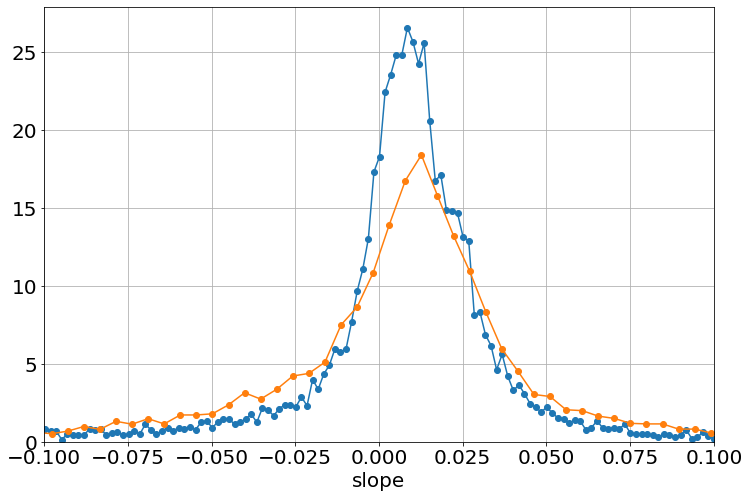

In [102]:
histogram(urban_slope,500);
histogram(rural_slope,500);
xlim([-.1,.1])
xlabel('slope')
mean(urban_slope),mean(rural_slope)

(-0.3, 0.3)

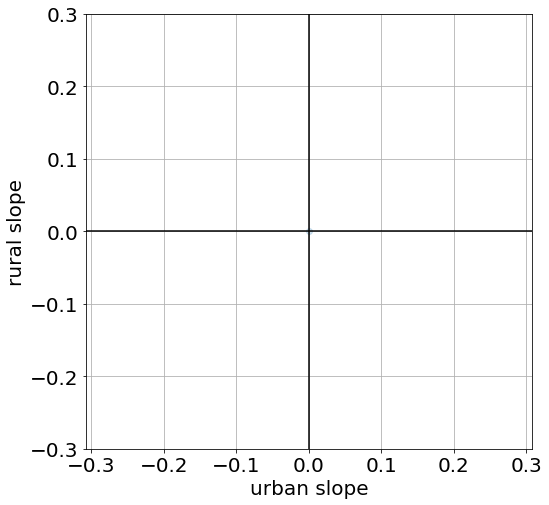

In [103]:
figure(figsize=(8,8))
plot([0],[0],'o',alpha=0.2)
axis('equal')
xlabel('urban slope')
ylabel('rural slope')
plot([0,0],[-.7,.7],'k')
plot([-.7,.7],[0,0],'k')
xlim([-.3,.3])
ylim([-.3,.3])

(-0.3, 0.3)

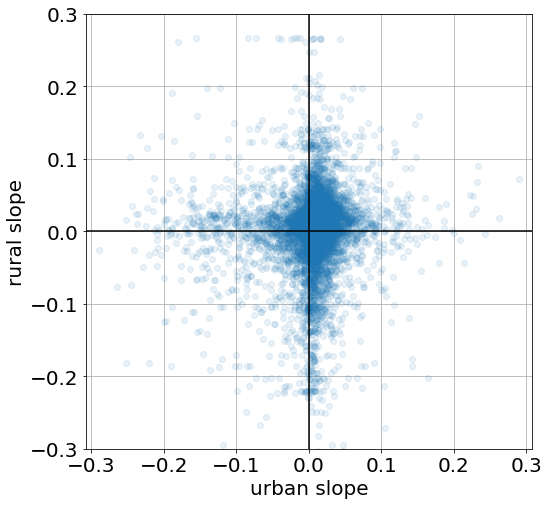

In [105]:
figure(figsize=(8,8))
plot(urban_slope,nearby_rural_slope,'o',alpha=0.1)
axis('equal')
xlabel('urban slope')
ylabel('rural slope')
plot([0,0],[-.7,.7],'k')
plot([-.7,.7],[0,0],'k')
xlim([-.3,.3])
ylim([-.3,.3])